# 任务一(2021.9.16)  流量/时间对数线性回归
$$ ln(-dQ/dt) = C_1 + C_2ln(Q) $$

## 1.读取CSV文件

In [1]:
import pandas as pd    #导入需要的包并命名为pd

In [2]:
df=pd.read_csv("./data/HJ-Andrews_WS02_mm_per_hour.csv") #读取csv文件
df   #单独放一个df在这里只是为了展示，没有任何操作。下文中出现的这种操作同样如此。

,Date,Q,P,ET
0,14-Sep-1994 00:00:00,0.004931,0.0,0.0000
1,14-Sep-1994 01:00:00,0.004941,0.0,0.0000
2,14-Sep-1994 02:00:00,0.004959,0.0,0.0000
3,14-Sep-1994 03:00:00,0.004973,0.0,0.0000
4,14-Sep-1994 04:00:00,0.004992,0.0,0.0000
...,...,...,...,...
17516,12-Sep-1996 20:00:00,0.011824,0.0,0.0007
17517,12-Sep-1996 21:00:00,0.011937,0.0,0.0003
17518,12-Sep-1996 22:00:00,0.012045,0.0,0.0002
17519,12-Sep-1996 23:00:00,0.012158,0.0,0.0001


In [3]:
Q=df["Q"]  #提取出CSV文件中的Q列
Q

0        0.004931
1        0.004941
2        0.004959
3        0.004973
4        0.004992
           ...   
17516    0.011824
17517    0.011937
17518    0.012045
17519    0.012158
17520    0.012271
Name: Q, Length: 17521, dtype: float64

## 2.计算ln(Q)

In [7]:
import numpy as np #导入numpy，numpy是一个非常常用的科学运算包
lnQ=np.log(Q)# np.log默认算的是ln哦
lnQ

0       -5.312193
1       -5.310287
2       -5.306485
3       -5.303644
4       -5.299867
           ...   
17516   -4.437600
17517   -4.428095
17518   -4.419070
17519   -4.409739
17520   -4.400494
Name: Q, Length: 17521, dtype: float64

## 3.计算dQ
计算方式: $dQ_i=Q_i-Q_{i+1}$    (就是这一行减去下一行的）

In [42]:
lnQ_list=list(lnQ)#将lnQ转换为list类型，方便运算
dQ=[]  #声明一个空list，之后算出来的dQ结果都要放入这个list中
selected_lnQ=[]    #声明一个空list，将挑选出来的lnQ放在这个list中

这里简单讲一下为什么要挑选一部分$lnQ$和$dQ$\
1.首先我们先回顾一下我们要做线性回归的公式:$ ln(-dQ/dt) = C_1 + C_2ln(Q) $\
2.在$ln(x)$中x必须满足$x>0$，因此dQ在这里需要算出来是一个负数(dt=1)\
3.在观察数据可以发现，通过算$dQ_i=Q_i-Q_{i+1}$得到的$dQ$会有正有负甚至还可能为0\
4.因此我在这里给它弄了个筛选条件：必须满足$|Q_i-Q_{i+1}|>0$才将这样的$dQ$还有其对应的$ln(Q)$保存下来给之后用
### 筛选以及保存过程

In [43]:
for i in range(len(Q)-1):
    if np.abs(Q[i]-Q[i+1])>0:           #筛选去除不为dQ不为0的部分,abs就是取绝对值
        selected_lnQ.append(lnQ[i])
        dQ.append(np.abs(Q[i]-Q[i+1]))
dQ=np.array(dQ) #将dQ转换成numpy array类型，方面数据运算
selected_lnQ=np.array(selected_lnQ)   #同上
selected_lnQ

array([-5.31219319, -5.31028671, -5.30648463, ..., -4.42809487,
       -4.41906994, -4.4097391 ])

### 看下筛选出来多少$dQ$和$lnQ$（二者数量应该是一样的）

In [44]:
print("number of dQ:{}".format(len(dQ)))
print("number of lnQ:{}".format(len(selected_lnQ)))

number of dQ:15348
number of lnQ:15348


## 4.计算$ln(-dQ/dt)$

In [45]:
dt=1
ln_minus_dQ_dT=np.log(np.abs(dQ))  
ln_minus_dQ_dT

array([-11.5737376 , -10.88059042, -11.16862679, ...,  -9.13134437,
        -9.08883095,  -9.0887424 ])

## 5.绘制散点 

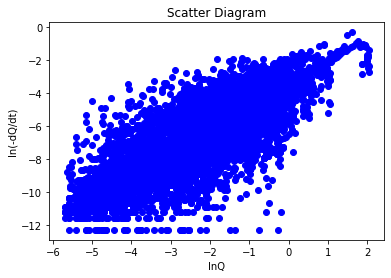

In [46]:
import matplotlib.pyplot as plt   #matplotlib是常用的绘图工具
X=selected_lnQ   #x轴为lnQ
Y=ln_minus_dQ_dT  #y轴为𝑙𝑛(−𝑑𝑄/𝑑𝑡)
plt.scatter(X, Y, c='b')   #绘制散点图，c（颜色）='b' blue
plt.xlabel('lnQ')   #横轴名称
plt.ylabel('ln(-dQ/dt)')     #纵轴名称
plt.title('Scatter Diagram')
plt.show()

## 6.线性回归（拟合）

In [47]:
k, b = np.polyfit(X, Y, 1)   #线性回归，k和b是拟合出来的斜率与截距
print("y={}x+{}".format(k,b))

y=1.1842184130572133x+-4.566683881992032


## 7.将拟合线与散点图绘制在一起

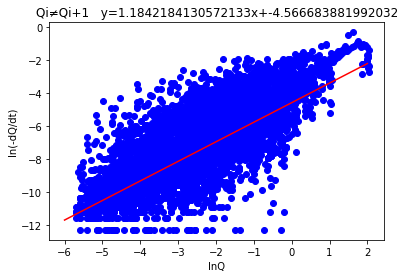

In [48]:
line_x = np.arange(-6, 3)
line_y = line_x*k+b
plt.scatter(X, Y, c='b')
plt.plot(line_x, line_y,c="r")
plt.xlabel('lnQ')
plt.ylabel('ln(-dQ/dt)')
plt.title('Qi≠Qi+1   y={}x+{}'.format(str(k),str(b)))
plt.show()


至此所有的工作流程就走完了

## 遗留的一些问题
### 1.我计算dQ的方法对不对，能不能这样处理？
### 2.在纵轴上有一系列值小于-12的点，应该是和dQ太小以至于数据范围不够导致，可以考虑去掉，去掉的方式参考如下：

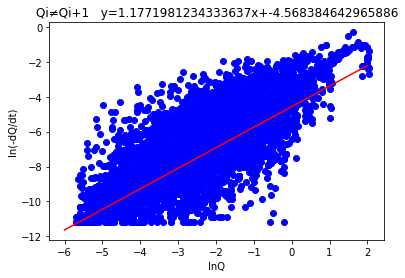

In [51]:
    X=np.array(selected_lnQ)
    Y=ln_minus_dQ_dT
    selected_index=np.argwhere(Y>-11.5)
    Y=np.squeeze(Y[selected_index])
    X=np.squeeze(X[selected_index])
    k, b = np.polyfit(X, Y, 1)
    fit_fn = np.poly1d((k,b))
    line_x = np.arange(-6, 3)
    line_y = line_x*k+b
    plt.scatter(X, Y, c='b')
    plt.plot(line_x, line_y,c="r")
    plt.xlabel('lnQ')
    plt.ylabel('ln(-dQ/dt)')
    plt.title('Qi≠Qi+1   y={}x+{}'.format(str(k),str(b)))
    plt.show()